In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [19]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [20]:
bs = boston['data']

In [96]:
target = boston['target']

In [112]:
feature = boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [23]:
df = pd.DataFrame(bs,columns=feature)

In [24]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
y = pd.DataFrame(target,columns=['SalePrice'])

In [26]:
df.shape,y.shape

((506, 13), (506, 1))

## EDA & FEATURE ENGINEERING

In [27]:
dict= {'CRIM':['per capita crime rate by town'],
       'ZN':['proportion of residential land over 25,000 sq.ft.'],
       'INDUS':['proportion of non-retail business acres per town'],
       'CHAS':['Charles River dummy variable'],
       'NOX':['nitric oxides concentration per 10 million'],
       'RM':['average number of rooms per dwelling'],
       'AGE':['proportion of owner-occupied prior to 1940'],
       'DIS':['distances to five Boston employment centres'],
       'RAD':['index of accessibility to radial highways'],
       'TAX':['full-value property-tax rate per $10,000'],
       'PTRATIO':['pupil-teacher ratio by town'],
       'B':['1000(Bk - 0.63)^2,Bk is the proportion of blacks'],
       'LSTAT':['% lower status of the population']}

In [28]:
des = pd.DataFrame(dict,index=['Description'])

In [29]:
print('\nDescription of the features:')
des.T


Description of the features:


,Description
CRIM,per capita crime rate by town
ZN,"proportion of residential land over 25,000 sq.ft."
INDUS,proportion of non-retail business acres per town
CHAS,Charles River dummy variable
NOX,nitric oxides concentration per 10 million
RM,average number of rooms per dwelling
AGE,proportion of owner-occupied prior to 1940
DIS,distances to five Boston employment centres
RAD,index of accessibility to radial highways
TAX,"full-value property-tax rate per $10,000"


In [30]:
df.CHAS.unique()

array([0., 1.])

In [31]:
print(f"If Bound by Charles River = {df.CHAS.unique()[1]}, Otherwise = {df.CHAS.unique()[0]}")

If Bound by Charles River = 1.0, Otherwise = 0.0


In [32]:
df.RAD.unique()

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

Count-Plots of two Categorical Datasets:



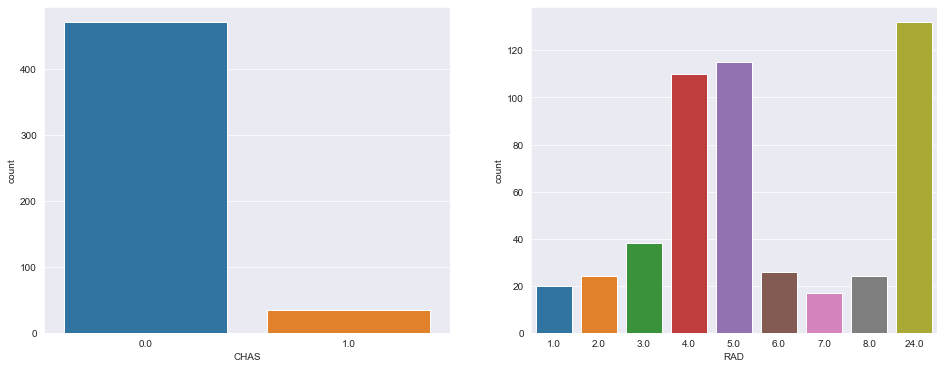

In [33]:
print('Count-Plots of two Categorical Datasets:\n')
f,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
sns.countplot(df.CHAS,ax=ax1)
sns.countplot(df.RAD,ax=ax2)
plt.show()

In [34]:
data = pd.concat([y,df],1).copy()

In [35]:
data.head(2)

,SalePrice,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


## Pearson corelation

In [36]:
corr = data.corr()
imp = corr[['SalePrice']]
imp = imp.sort_values(by='SalePrice',ascending=False)


   Feature Importance:


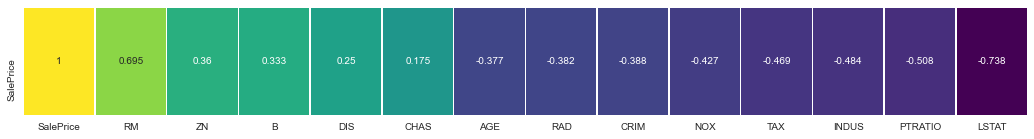

In [37]:
print("\n   Feature Importance:")
plt.figure(figsize=(18,2))
sns.heatmap(imp.T,annot=True,fmt='.3g',linewidths=0.5,cbar=False,cmap='viridis')
plt.show()

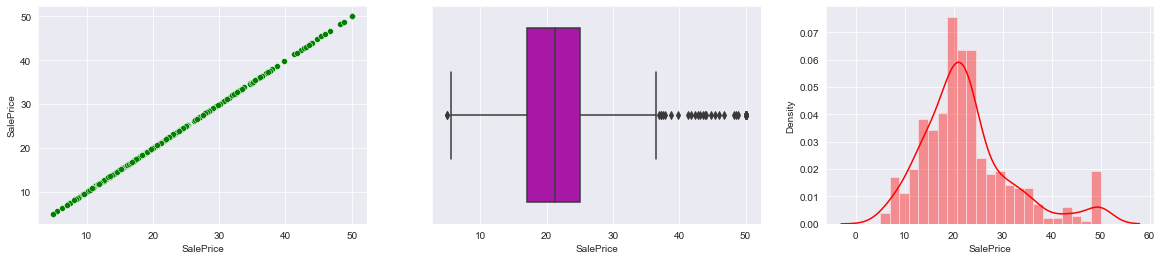

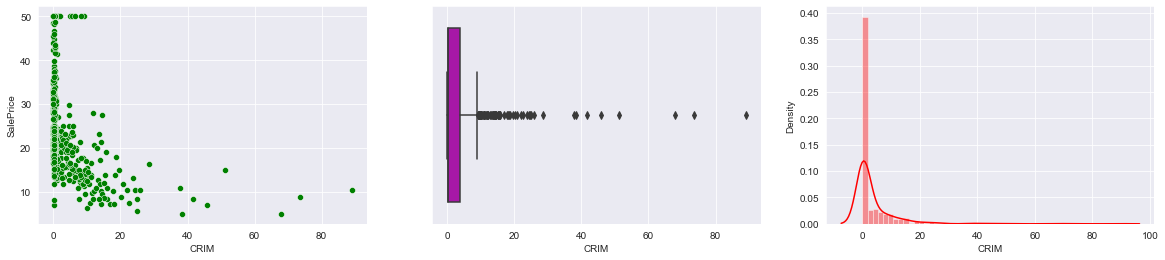

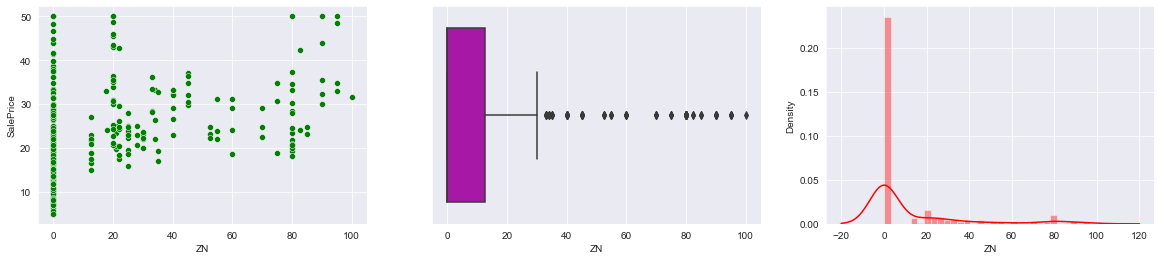

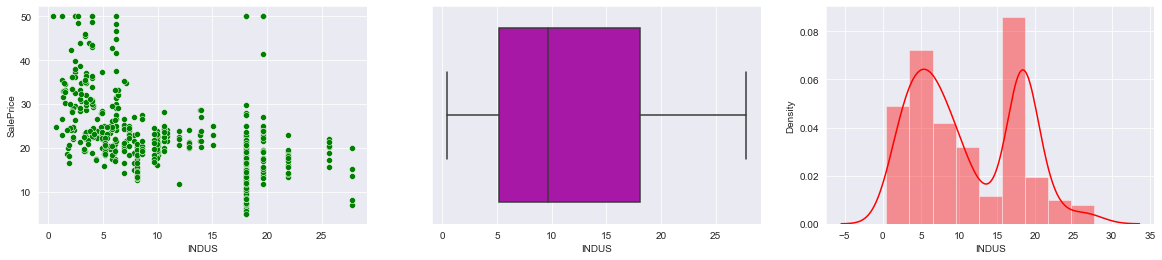

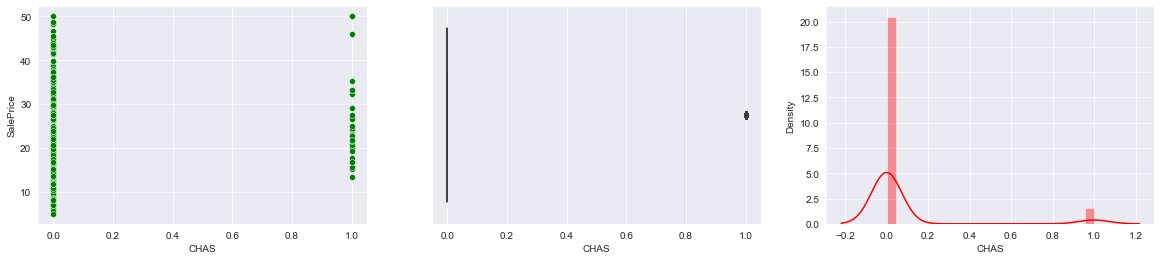

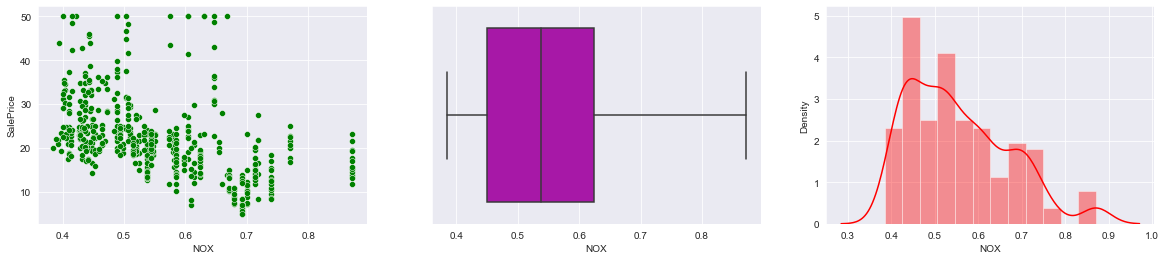

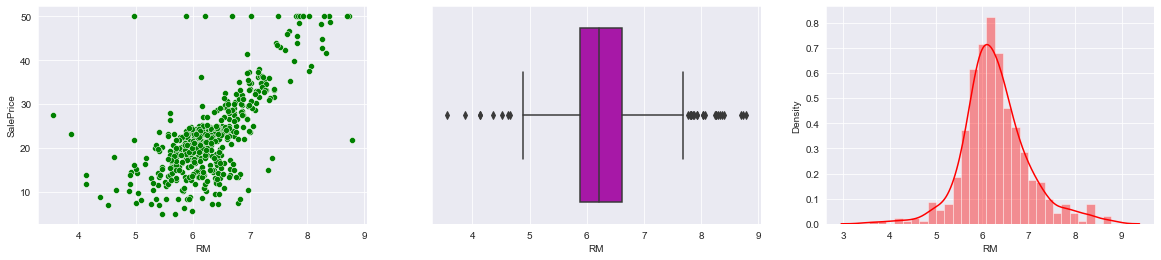

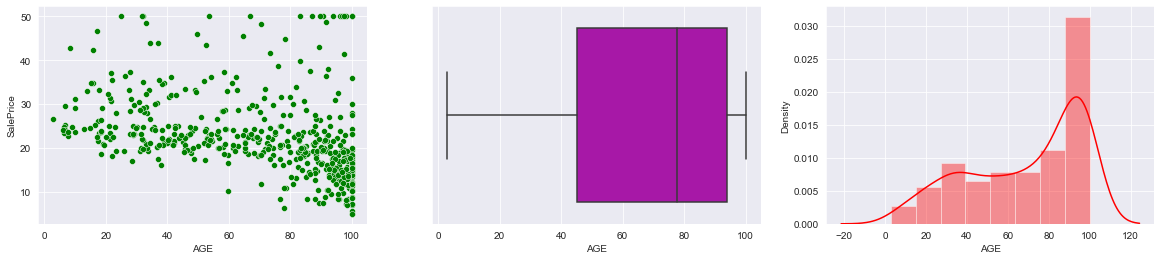

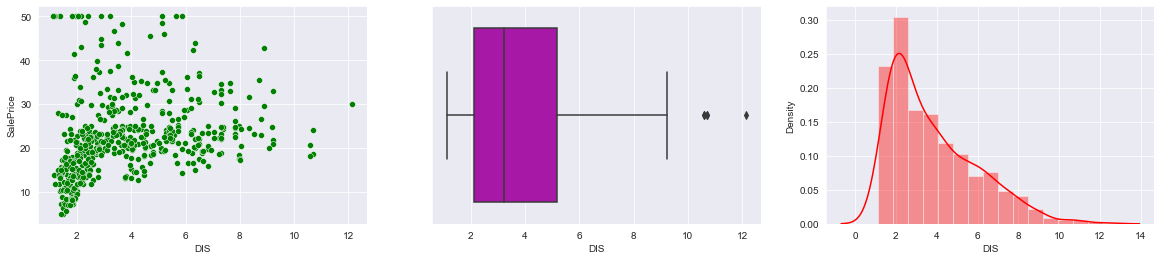

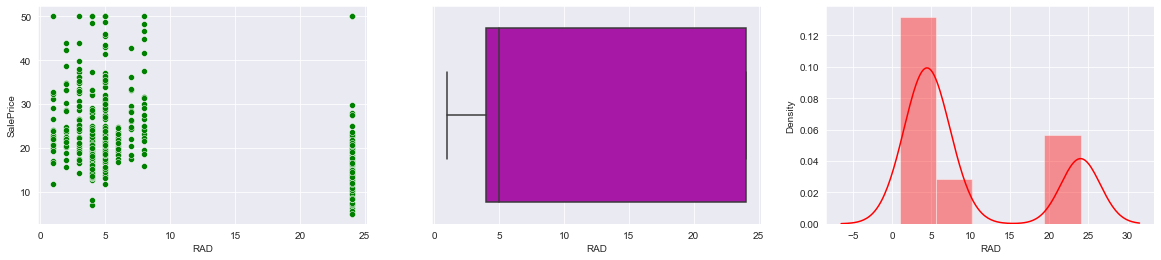

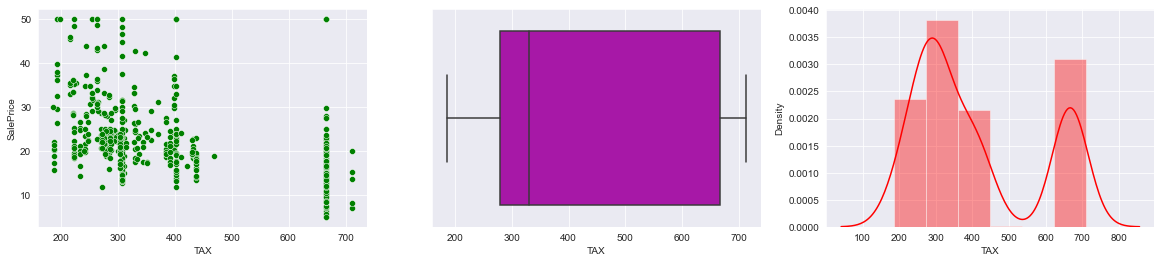

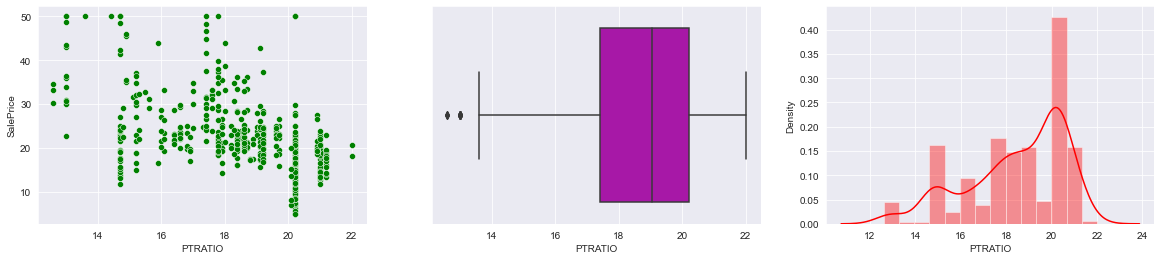

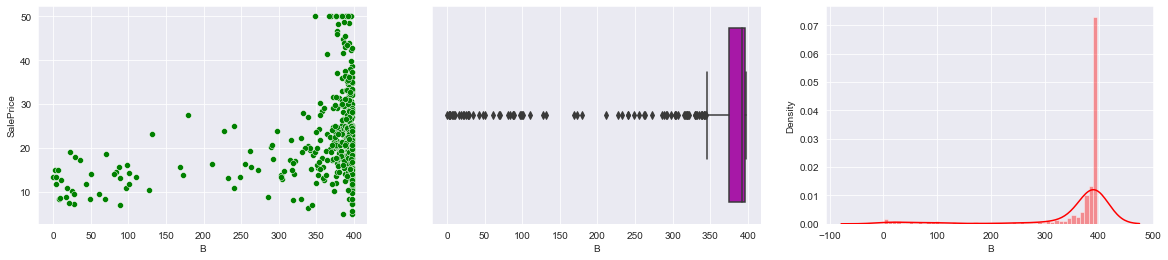

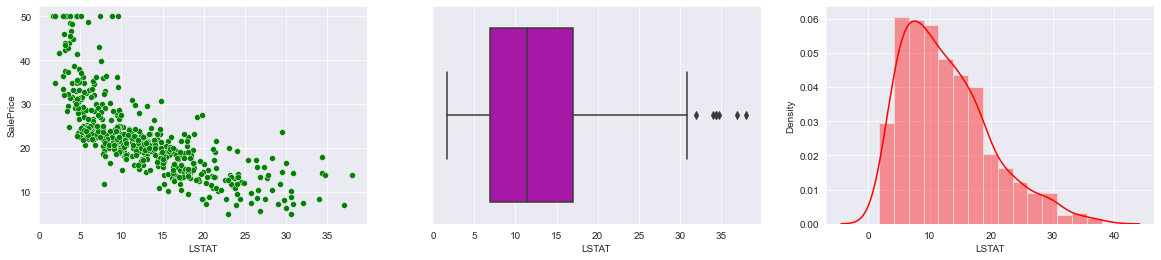

In [38]:
for i in range(len(data.columns)):
    a = data[data.columns[i]]
    b = data['SalePrice']
    f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,4))
    sns.scatterplot(a,b,ax=ax1,color='g')
    sns.boxplot(a,ax=ax2,color='m')
    sns.distplot(a,ax=ax3,color='r')

## Removing some outliers with Z-score transformation method

In [39]:
def Z_score(data,left,right):
    index= []
    mean = data.mean()
    std = data.std()
    for i in range(len(data)):
        z = (data[i]-mean)/std
        if (z >= -left) and (z <= right):
            index.append(i)
        else:
            pass
    return index 

In [40]:
clean_index = Z_score(y.SalePrice,2.5,2.4)
print("Data to be cleaned:{}".format(len(y) - len(clean_index)))

Data to be cleaned:23


In [41]:
len(clean_index)

483

In [42]:
Df = data.iloc[clean_index].reset_index(drop=True).copy() #Cleaning Data sets
Df.shape

(483, 14)

In [43]:
Df.head(2)

,SalePrice,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [44]:
del y,df,data

In [45]:
X = Df.drop(['SalePrice'],1).copy()
y = Df['SalePrice'].copy()

In [46]:
del Df

In [47]:
X.shape,y.shape

((483, 13), (483,))

In [48]:
X.to_csv('Xdata.csv',index=None)
Xd = pd.read_csv('Xdata.csv')
Xd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## LASSO

In [49]:
from sklearn.linear_model import Lasso

In [50]:
lasso = Lasso(alpha=0.50,max_iter=2000)
lasso.fit(X,y)

Lasso(alpha=0.5, max_iter=2000)

In [51]:
coeff_values = pd.DataFrame({'coeff':lasso.coef_},index=X.columns).sort_values(by='coeff')
c = (abs(coeff_values.coeff) == 0)
col_non_imp = list(X.columns[c])
len(col_non_imp)

2

In [52]:
col_non_imp

['DIS', 'RAD']

In [53]:
X.drop(col_non_imp,1,inplace=True) #Two non-important-features( 'DIS' & 'RAD') are removed

In [54]:
y = pd.DataFrame(y)
y.shape

(483, 1)

In [55]:
#Making log transformation of the features, Except 'CHAS'
feat = [col for col in X.columns if col != 'CHAS'] 
feat

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT']

Replacing Zero by-> One, otherwise logarithm will give error ,for that reason I did not taken 'CHAS'

In [56]:
for col in feat:
    X[col] = X[col].replace({0:1})  

In [57]:
X.shape

(483, 11)

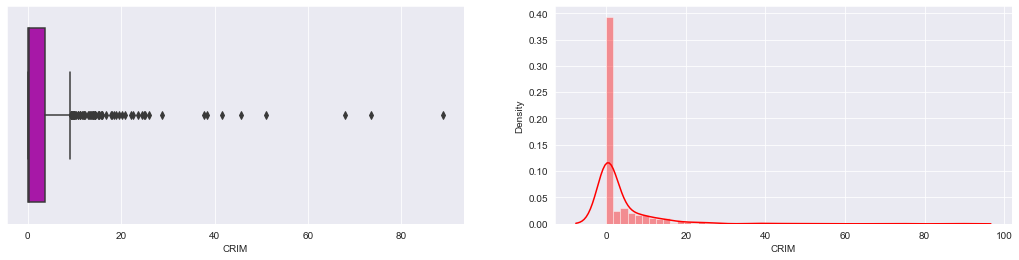

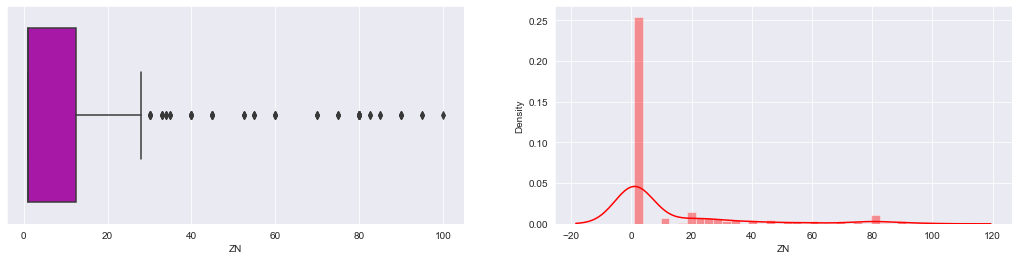

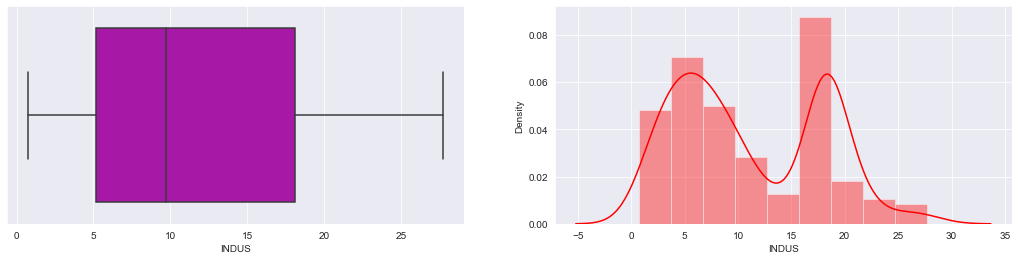

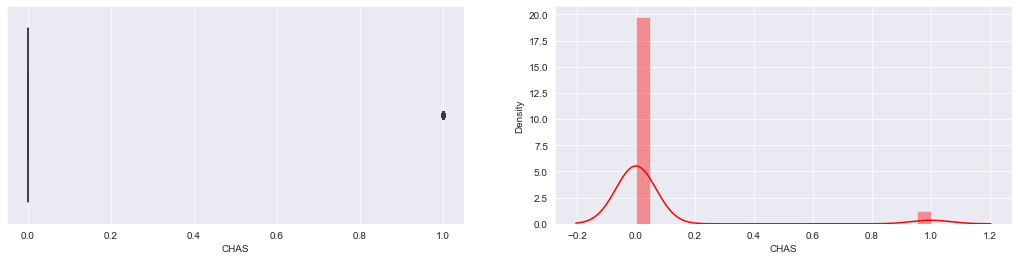

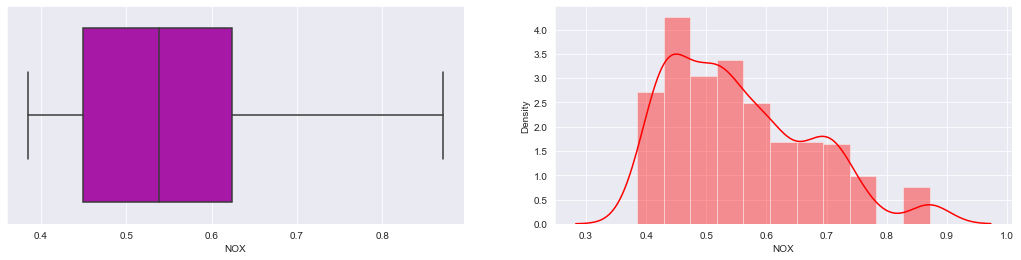

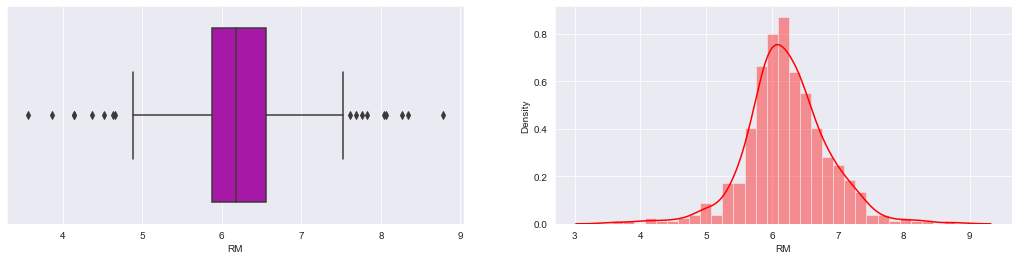

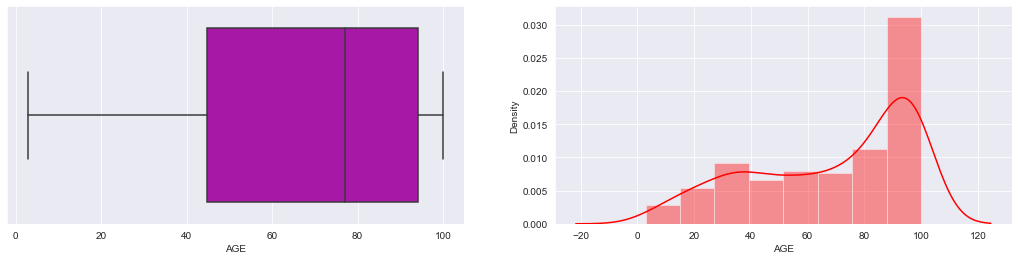

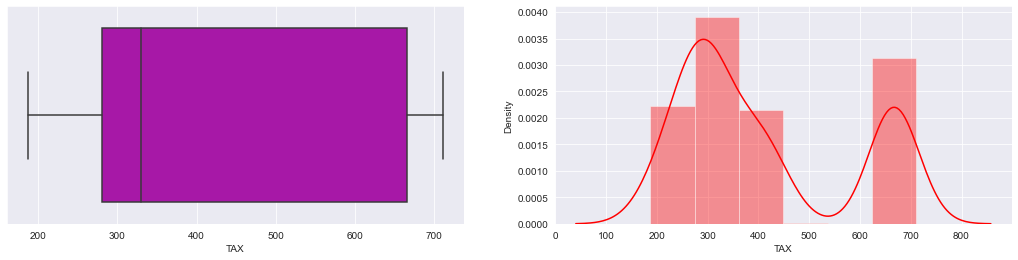

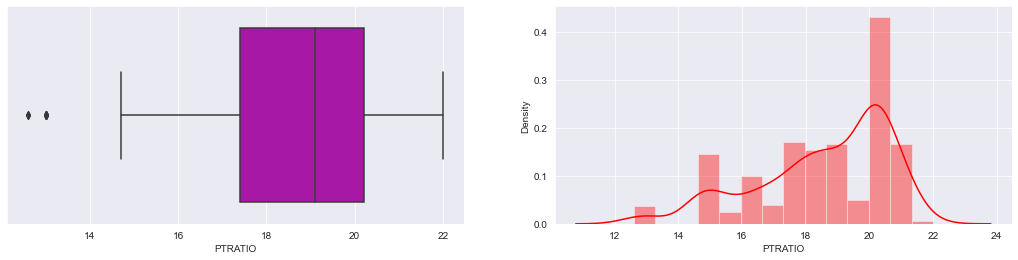

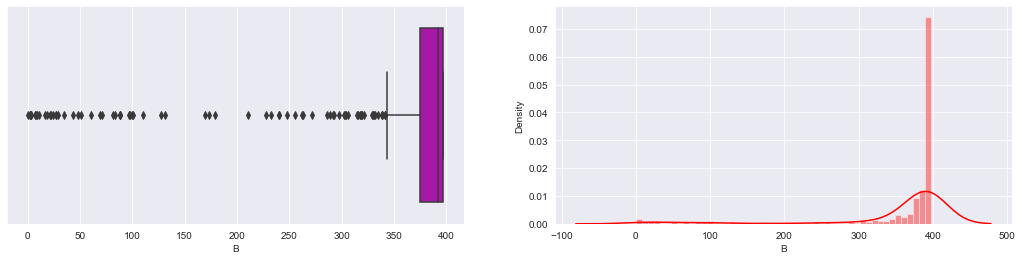

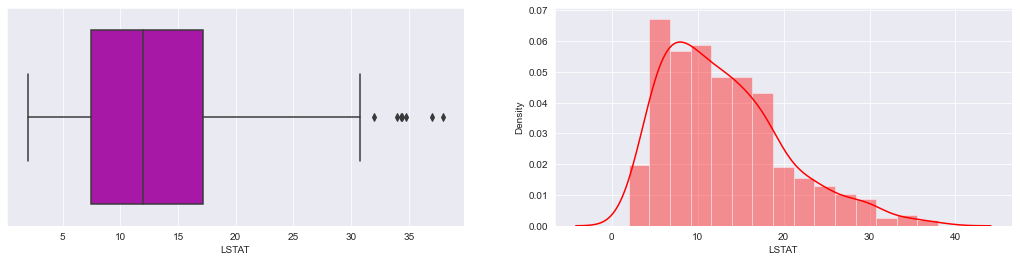

In [58]:
for i in range(len(X.columns)):
    a = X[X.columns[i]]
    f,(ax1,ax2)=plt.subplots(1,2,figsize=(18,4))
    sns.boxplot(a,ax=ax1,color='m')
    sns.distplot(a,ax=ax2,color='r')

From the above distribution pattarn I can remove 'CHAS' & 'B' features, for better performance


In [59]:
X.drop(['CHAS','B'],1,inplace=True)

In [60]:
X.shape

(483, 9)

## Scaling the data sets to standard Normal distribution

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(X).copy()
x.shape,y.shape
x = pd.DataFrame(x,columns=X.columns)

In [62]:
del X

In [63]:
x.to_csv('X.csv',index=False) #Saving the scaled data into csv file
y.to_csv('y.csv',index=False)

In [64]:
del x,y

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

In [67]:
X.shape,y.shape

((483, 9), (483, 1))

In [68]:
y = y['SalePrice']

In [69]:
y.shape

(483,)

I have seen from EDA that, this data sets have some curve in nature so, I will go for polynomial regression method of degree 2

Importing Polynomial-features

In [70]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,interaction_only=False)
x = poly.fit_transform(X)
x = pd.DataFrame(x)
x.shape

(483, 55)

## Splitting the datasets into train-sets and test-sets

In [71]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
xtrain=np.array(X_train)
xtest=np.array(X_test)
ytrain=y_train
ytest=y_test
xtrain.shape,xtest.shape

((386, 55), (97, 55))

In [74]:
def normalEq(xtrain,ytrain,xtest,ytest):
    m = len(xtrain)
    n = len(xtrain.T)
    lam = eval(input('Enter Regularisation Factor(Lambda): '))
    p=pd.DataFrame(np.eye(n-1).T)
    o =pd.DataFrame(np.zeros(n-1))
    #making regularisation factor
    rg = pd.concat([pd.DataFrame(np.zeros(n-1)),pd.concat([o,p],1).T],1)
    #normal equation,directly calculating thetas(intercept & cofficients)
    Theta = np.dot(np.dot(np.linalg.inv(np.dot(xtrain.T,xtrain) + np.array(rg)*lam),xtrain.T),ytrain)

    Ptest = np.dot(xtest,Theta)   # predicting for test data
    Ptrain = np.dot(xtrain,Theta) # predicting for train data
                
    from sklearn.metrics import r2_score,mean_squared_error
    mse = mean_squared_error(Ptest,ytest) 
    score = r2_score(Ptest,ytest)
    mse1 = mean_squared_error(Ptrain,ytrain)
    score1 = r2_score(Ptrain,ytrain)
    
    print('\n')
    print('*'*45)
    print('MSE,for test data     : ',mse)
    print('RMSE,for test data    : ',np.sqrt(mse))
    print('R2-score for test data: ',round(score*100,2),'%')
    print('*'*45)
    
    print('\n')
    print('*'*45)
    print('MSE,for train data     : ',mse1)
    print('RMSE,for train data    : ',np.sqrt(mse1))
    print('R2-score for train data: ',round(score1*100,2),'%')
    print('*'*45)
    
    #ploting for test data result
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

    ax1.scatter(Ptest,ytest,color='g')
    ax1.plot([0,Ptest.max()],[0,ytest.max()],color='y')
    ax1.set_xlabel('Predicted Data Set')
    ax1.set_ylabel('Original Data Set')
    ax1.set_title('Comparisign Graph')
    sns.despine(left=True)
    ax1.grid()

    sns.distplot((Ptest-ytest),color='r',bins=10)
    ax2.set_title('Distribution Plot for Predicting & Testing Data Set')
    ax2.grid()
    sns.despine(left=True)
    
    #ploting for train data result
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

    ax1.scatter(Ptrain,ytrain,color='g')
    ax1.plot([0,Ptrain.max()],[0,ytrain.max()],color='y')
    ax1.set_xlabel('Predicted Data Set')
    ax1.set_ylabel('Original Data Set')
    ax1.set_title('Comparisign Graph')
    sns.despine(left=True)
    ax1.grid()

    sns.distplot((Ptrain-ytrain),color='r',bins=10)
    ax2.set_title('Distribution Plot for Predicting & Traing Data Set')
    ax2.grid()
    sns.despine(left=True)
    return pd.DataFrame(Theta).T

Enter Regularisation Factor(Lambda): 0.002


*********************************************
MSE,for test data     :  6.117574540779264
RMSE,for test data    :  2.4733731099005793
R2-score for test data:  86.71 %
*********************************************


*********************************************
MSE,for train data     :  6.478236747491805
RMSE,for train data    :  2.545238053206773
R2-score for train data:  86.05 %
*********************************************


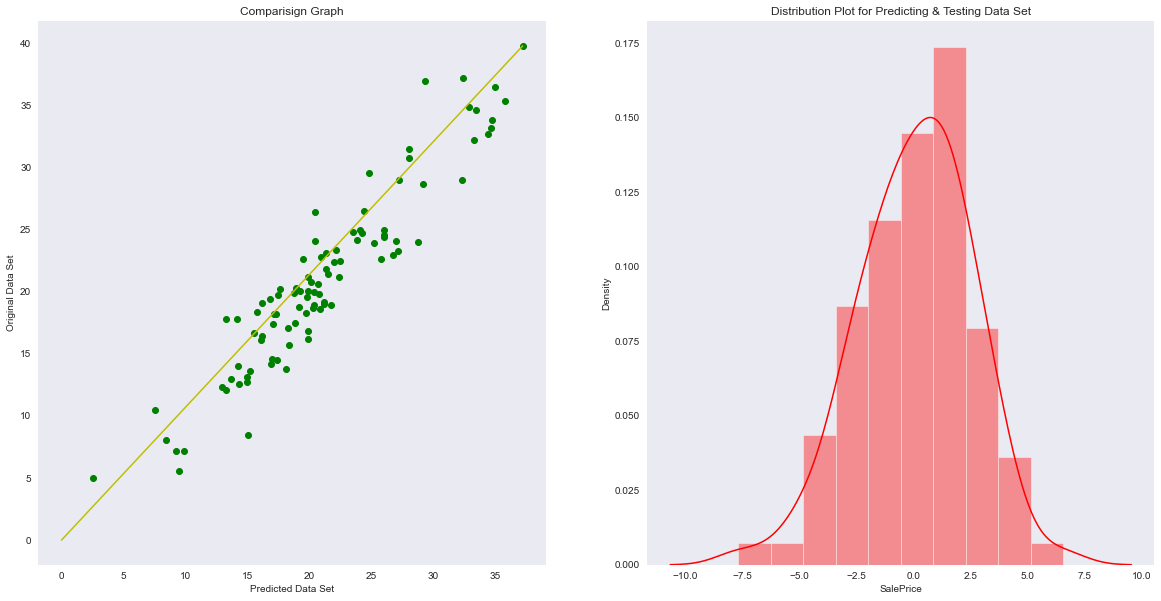

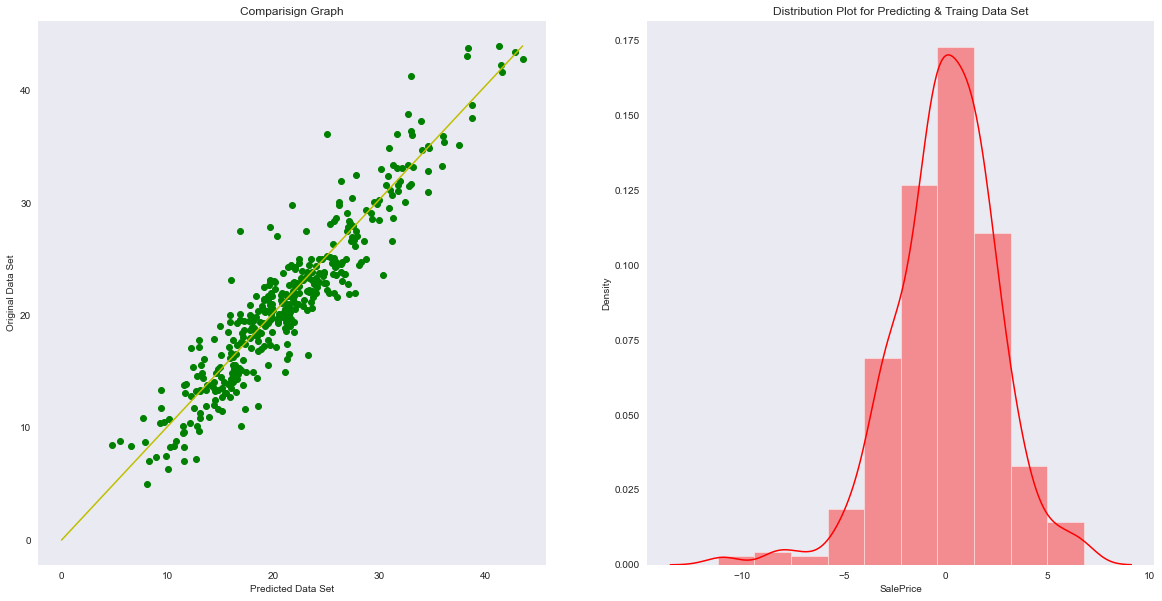

In [75]:
theta = normalEq(xtrain,ytrain,xtest,ytest)

## SKlearn Model

In [78]:
def SKLEARN(xtrain,ytrain,xtest,ytest):
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score,mean_squared_error
    reg = LinearRegression(normalize=True)
    reg.fit(xtrain,ytrain)

    #prediction result and plot for test data
    pred = reg.predict(xtest)
    score = r2_score(pred,ytest)
    mse = mean_squared_error(pred,ytest)
    rmse = np.sqrt(mse)
    print('*'*45)
    print("R2-Score for test data:",round(score*100,2),"%")
    print("MSE for test data     :",round(mse,4))
    print("RMSE for test data    :",round(rmse,4))
    print('*'*45)

    #prediction result and plot for train data
    preda = reg.predict(xtrain)
    
    score1 = r2_score(preda,ytrain)
    mse1 = mean_squared_error(preda,ytrain)
    rmse1 = np.sqrt(mse)
    print("\n nR2-Score for train data:",round(score1*100,2),"%")
    print("MSE for train data     :",round(mse1,4))
    print("RMSE for train data    :",round(rmse1,4))
    print('*'*45)
    
    
    #ploting for test data
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
    ax1.scatter(pred,ytest,color='g')
    ax1.plot([0,ytest.max()],[0,pred.max()],color='y')
    ax1.set_xlabel('Predicted Data Set')
    ax1.set_ylabel('Test Data Set')
    ax1.set_title('Comparisign Graph')
    sns.despine(left=True)

    sns.distplot((pred-ytest),color='red',bins=10)
    ax2.set_xlabel('[PREDICTED PRICE - PRICE]')
    ax2.set_title('Distribution Plot for Predicted & Test Data')
    ax2.grid()
    sns.despine(left=True) 

    #ploting for train data
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))     
    ax1.scatter(preda,ytrain,color='g')
    ax1.plot([0,ytrain.max()],[0,preda.max()],color='y')
    ax1.set_xlabel('Predicted Data Set')
    ax1.set_ylabel('Original Data Set')
    ax1.set_title('Comparisign Graph')
    sns.despine(left=True)

    sns.distplot((preda-ytrain),color='red',bins=10)
    ax2.set_xlabel('[PREDICTED PRICE - PRICE]')
    ax2.set_title('Distribution Plot for Predicted & Train Data')
    ax2.grid()
    sns.despine(left=True) 
    return reg

*********************************************
R2-Score for test data: 86.64 %
MSE for test data     : 6.1443
RMSE for test data    : 2.4788
*********************************************

 nR2-Score for train data: 86.07 %
MSE for train data     : 6.4739
RMSE for train data    : 2.4788
*********************************************


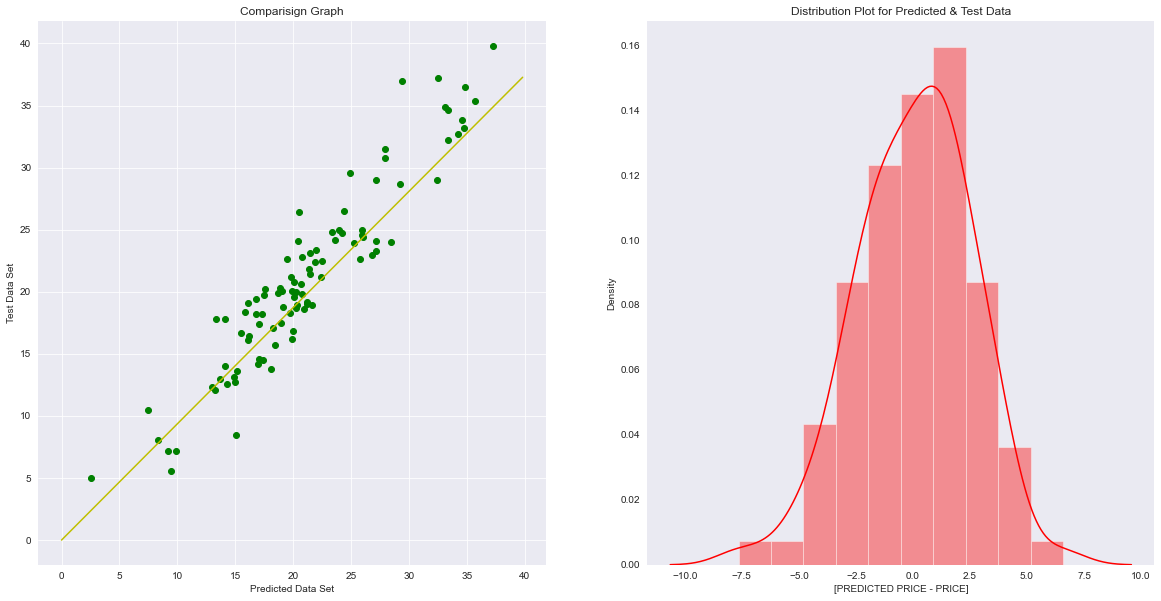

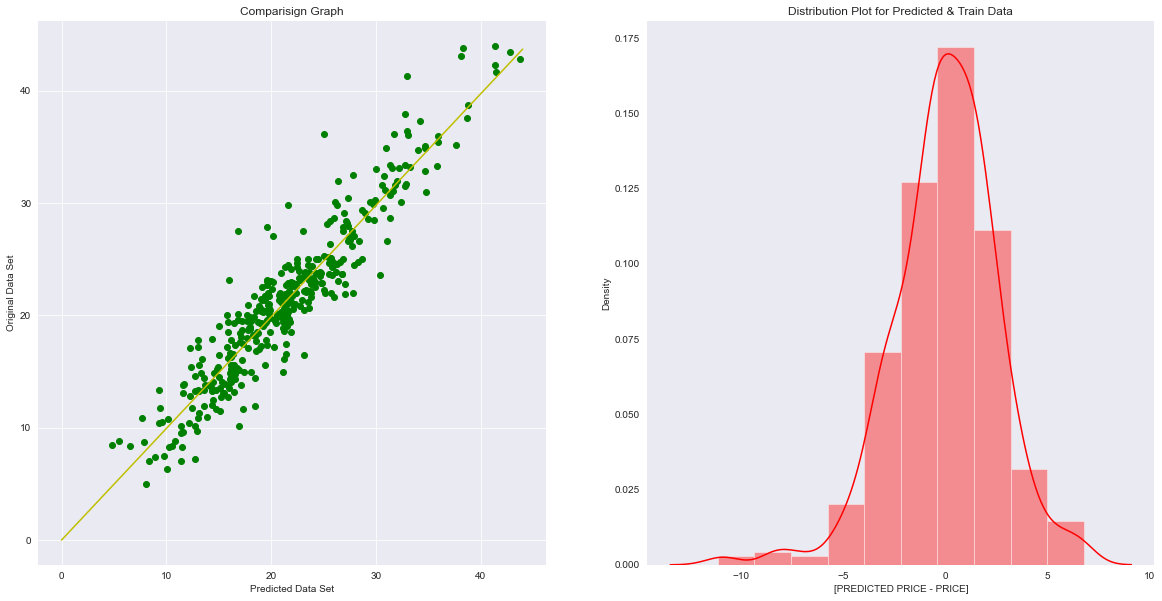

In [79]:
model = SKLEARN(xtrain,ytrain,xtest,ytest)

**Both Noarmal Equation Model with regularisation factor and Sklearn model giving same result.

**So, I can take any one out of the two model for further use(prediction)

## Prediction

In [128]:
def prediction(data=xtrain,index=0):
    pred = model.predict([data[index]])[0]
    text = 'Price: $'+str(round(pred*1000,3))
    print(text)

In [129]:
prediction(index=0)

Price: $14720.222


In [130]:
prediction(index=100)

Price: $18912.765


In [131]:
prediction(index=20)

Price: $17815.046


In [132]:
prediction(index=90)

Price: $13705.389


## ----------------------------------------------------------------------------------------------------------------------------